<a href="https://colab.research.google.com/github/samuelacquatey/DS-study-notebooks/blob/main/ALX_Movie_Recommender_System_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import our regular old heroes
import numpy as np
import pandas as pd
import scipy as sp # <-- The sister of Numpy, used in our code for numerical efficiency.
import matplotlib.pyplot as plt
import seaborn as sns

#for standardizing some of my data
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Entity featurization and similarity computation
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# Libraries used during sorting procedures.
import operator # <-- Convenient item retrieval during iteration
import heapq # <-- Efficient sorting of large lists

# Imported for our sanity
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd

# Load datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
movies_df = pd.read_csv('movies.csv')
tags_df = pd.read_csv('tags.csv')
genome_scores_df = pd.read_csv('genome_scores.csv')
genome_tags_df = pd.read_csv('genome_tags.csv')
links_df = pd.read_csv('links.csv')
imdb_data_df = pd.read_csv('imdb_data.csv')
sample_submission_df = pd.read_csv('sample_submission.csv')

In [16]:
train_df.head()

,userId,movieId,rating,timestamp
0,5163,57669.0,4.0,1.518350e+09
1,106343,5.0,4.5,1.206239e+09
2,146790,5459.0,5.0,1.076216e+09
3,106362,32296.0,2.0,1.423043e+09
4,9041,366.0,3.0,8.333758e+08


In [17]:
genome_tags_df.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [25]:
imdb_data_df.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


In [12]:
genome_scores_df.head()

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


In [31]:
test_df.head()

,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318


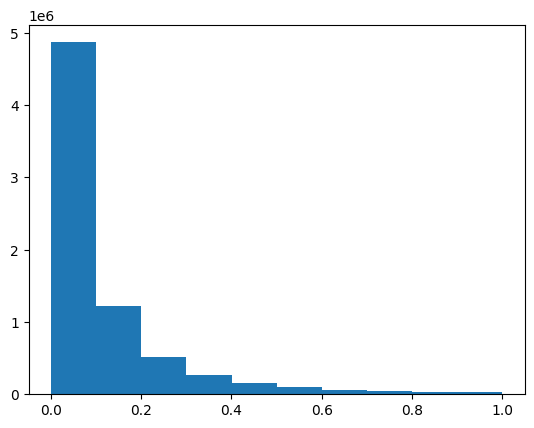

In [18]:
plt.hist(genome_scores_df['relevance'])
plt.show()

In [4]:
# Merge train_df with genome_tags_df and imdb_data_df on movieId
# We assume that imdb_data_df has been properly joined with the corresponding movieId data.
merged_df = pd.merge(train_df, genome_scores_df, on='movieId', how='left')
merged_df = pd.merge(merged_df, genome_tags_df, on='tagId', how='left')
merged_df = pd.merge(merged_df, imdb_data_df, on='movieId', how='left')
merged_df = pd.merge(merged_df, movies_df, on='movieId', how='left')

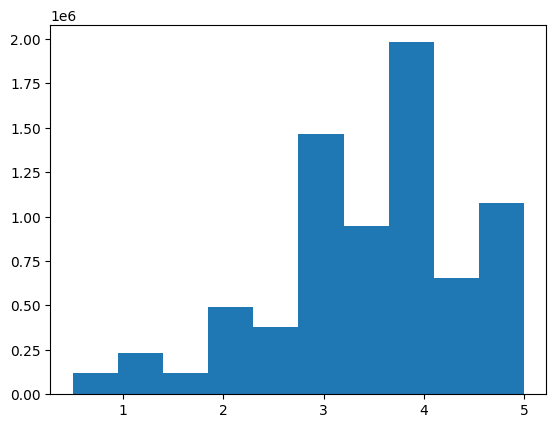

In [4]:
plt.hist(train_df['rating'])
plt.show()

In [5]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
movies_df.shape

(62423, 3)

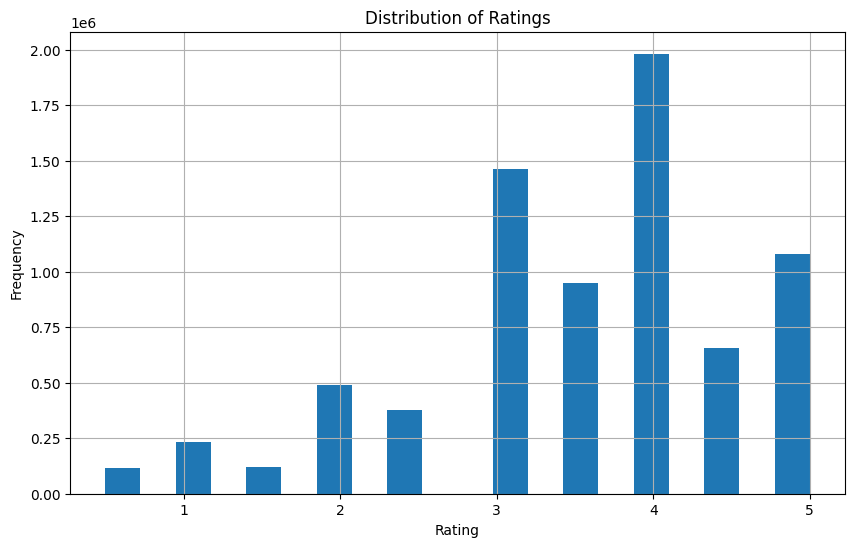

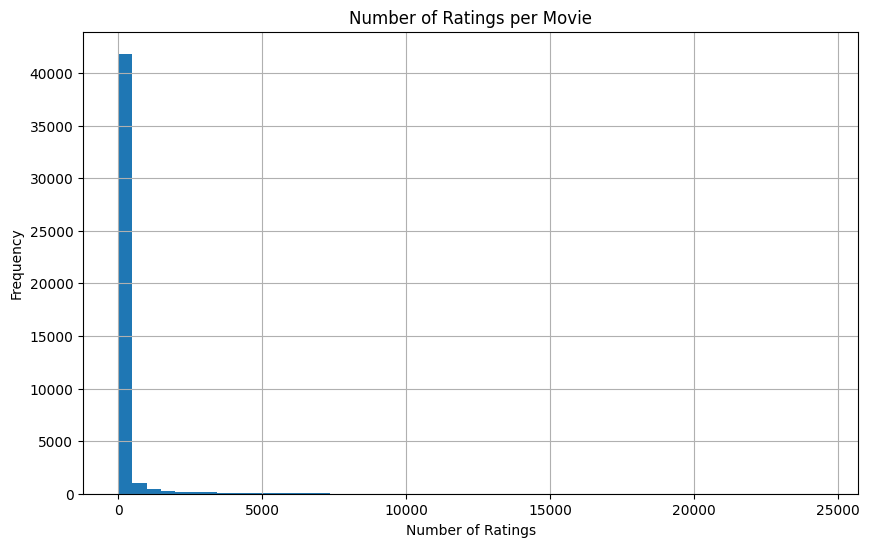

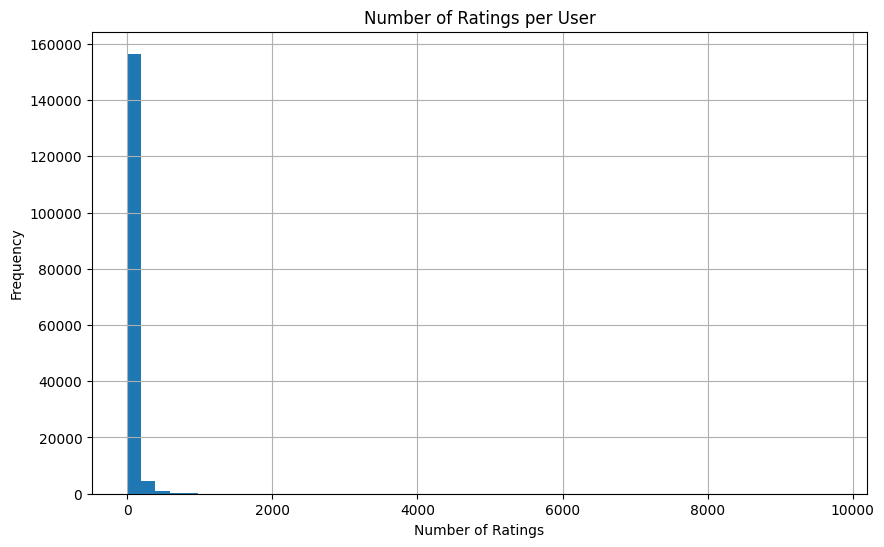

In [7]:
import matplotlib.pyplot as plt

# Plot rating distribution
plt.figure(figsize=(10, 6))
train_df['rating'].hist(bins=20)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Plot number of ratings per movie
ratings_per_movie = train_df.groupby('movieId').size()
plt.figure(figsize=(10, 6))
ratings_per_movie.hist(bins=50)
plt.title('Number of Ratings per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()

# Plot number of ratings per user
ratings_per_user = train_df.groupby('userId').size()
plt.figure(figsize=(10, 6))
ratings_per_user.hist(bins=50)
plt.title('Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Handle missing values (if any)
train_df = train_df.dropna()

# Create user-item interaction matrix
user_item_matrix = train_df.pivot(index='userId', columns='movieId', values='rating')
user_item_matrix.fillna(0, inplace=True)


